## Part 2

In [1]:
# import the necessary libraries
from math import sqrt

import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# set up the metric calculations
def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""

    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r ** 2

    return R2


def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""

    res = (observed - estimated) ** 2
    RMSE = round(sqrt(res.mean()), 3)

    return RMSE

In [3]:
# read in flows data
london_flows = pd.read_csv("london_flows.csv")
london_flows.head()

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


In [4]:
london_flows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61474 entries, 0 to 61473
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61474 non-null  object 
 1   station_destination  61474 non-null  object 
 2   flows                61474 non-null  int64  
 3   population           61474 non-null  int64  
 4   jobs                 61474 non-null  int64  
 5   distance             61474 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.8+ MB


In [5]:
# now we can create a pivot table to turn paired list into a matrix, and compute the margin as well
london_flows_pivot = pd.pivot_table(
    london_flows,
    values="flows",
    index="station_origin",
    columns="station_destination",
    aggfunc=np.sum,
    margins=True,
)
london_flows_pivot

pd.set_option("display.max_columns", None)
london_flows_pivot



station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,Archway,Arnos Grove,Arsenal,Baker Street,Balham,Bank and Monument,Barbican,Barking,Barkingside,Barons Court,Battersea Park,Bayswater,Beckton,Beckton Park,Becontree,Belsize Park,Bermondsey,Bethnal Green,Blackfriars,Blackhorse Road,Blackwall,Bond Street,Borough,Boston Manor,Bounds Green,Bow Church,Bow Road,Brent Cross,Brentwood,Brixton,Brockley,Bromley-by-Bow,Brondesbury,Brondesbury Park,Bruce Grove,Buckhurst Hill,Burnt Oak,Bush Hill Park,Bushey,Caledonian Road,Caledonian Road & Barnsbury,Cambridge Heath,Camden Road,Camden Town,Canada Water,Canary Wharf,Canning Town,Cannon Street,Canonbury,Canons Park,Carpenders Park,Chadwell Heath,Chalfont & Latimer,Chalk Farm,Chancery Lane,Charing Cross,Chesham,Cheshunt,Chigwell,Chingford,Chiswick Park,Chorleywood,Clapham Common,Clapham High Street,Clapham Junction,Clapham North,Clapham South,Clapton,Cockfosters,Colindale,Colliers Wood,Covent Garden,Crossharbour,Crouch Hill,Croxley,Crystal Palace,Custom House,Cutty Sark,Cyprus,Dagenham East,Dagenham Heathway,Dalston Junction,Dalston Kingsland,Debden,Denmark Hill,Deptford Bridge,Devons Road,Dollis Hill,Ealing Broadway,Ealing Common,Earl's Court,East Acton,East Finchley,East Ham,East India,East Putney,Eastcote,Edgware,Edgware Road,Edmonton Green,Elephant & Castle,Elm Park,Elverson Road,Embankment,Emerson Park,Enfield Town,Epping,Euston,Euston Square,Fairlop,Farringdon,Finchley Central,Finchley Road,Finchley Road & Frognal,Finsbury Park,Forest Gate,Forest Hill,Fulham Broadway,Gallions Reach,Gants Hill,Gidea Park,Gloucester Road,Golders Green,Goldhawk Road,Goodge Street,Goodmayes,Gospel Oak,Grange Hill,Great Portland Street,Green Park,Greenford,Greenwich,Gunnersbury,Hackney Central,Hackney Downs,Hackney Wick,Haggerston,Hainault,Hammersmith,Hampstead,Hampstead Heath,Hanger Lane,Harlesden,Harold Wood,Harringay Green Lanes,Harrow & Wealdstone,Harrow-on-the-Hill,Hatch End,Hatton Cross,Headstone Lane,Heathrow Terminal 4,Heathrow Terminal 5,Heathrow Terminals 2 & 3,Hendon Central,Heron Quays,High Barnet,High Street Kensington,Highams Park,Highbury & Islington,Highgate,Hillingdon,Holborn,Holland Park,Holloway Road,Homerton,Honor Oak Park,Hornchurch,Hounslow Central,Hounslow East,Hounslow West,Hoxton,Hyde Park Corner,Ickenham,Ilford,Imperial Wharf,Island Gardens,Kennington,Kensal Green,Kensal Rise,Kensington,Kentish Town,Kentish Town West,Kenton,Kew Gardens,Kilburn,Kilburn High Road,Kilburn Park,King George V,King's Cross St. Pancras,Kingsbury,Knightsbridge,Ladbroke Grove,Lambeth North,Lancaster Gate,Langdon Park,Latimer Road,Leicester Square,Lewisham,Leyton,Leyton Midland Road,Leytonstone,Leytonstone High Road,Limehouse,Liverpool Street,London Bridge,London City Airport,London Fields,Loughton,Maida Vale,Manor House,Manor Park,Mansion House,Marble Arch,Maryland,Marylebone,Mile End,Mill Hill East,Moor Park,Moorgate,Morden,Mornington Crescent,Mudchute,Neasden,New Cross,New Cross Gate,Newbury Park,North Acton,North Ealing,North Greenwich,North Harrow,North Wembley,Northfields,Northolt,Northwick Park,Northwood,Northwood Hills,Norwood Junction,Notting Hill Gate,Oakwood,Old Street,Osterley,Oval,Oxford Circus,Paddington,Park Royal,Parsons Green,Peckham Rye,Penge West,Perivale,Piccadilly Circus,Pimlico,Pinner,Plaistow,Pontoon Dock,Poplar,Preston Road,Prince Regent,Pudding Mill Lane,Putney Bridge,Queen's Park,Queens Road Peckham,Queensbury,Queensway,Ravenscourt Park,Rayners Lane,Rectory Road,Redbridge,Regent's Park,Richmond,Rickmansworth,Roding Valley,Romford,Rotherhithe,Royal Albert,Royal Oak,Royal Victoria,Ruislip,Ruislip Gardens,Ruislip Manor,Russell Square,Seven Kings,Seven Sisters,Shadwell,Shenfield,Shepherd's Bush,Shepherd's Bush Market,Shoreditch High Street,Silver Street,Sloane Square,Snaresbrook,South Acton,South Ealing,South Hampstead,South Harrow,South Kensington,South Kenton,South Quay,South Ruislip,South Tottenham,South Wimbledon,Sou

In [6]:
london_flows.drop(
    london_flows[london_flows["station_origin"] == "Battersea Park"].index, inplace=True
)

In [7]:
london_flows.drop(
    london_flows[london_flows["station_destination"] == "Battersea Park"].index,
    inplace=True,
)

In [8]:
london_flows.drop(london_flows[london_flows["distance"] == 0].index, inplace=True)

In [9]:
london_flows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61413 entries, 0 to 61473
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61413 non-null  object 
 1   station_destination  61413 non-null  object 
 2   flows                61413 non-null  int64  
 3   population           61413 non-null  int64  
 4   jobs                 61413 non-null  int64  
 5   distance             61413 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 3.3+ MB


In [10]:
# pivot table beore (after emoving battersea, and 0 distance )

# now we can create a pivot table to turn paired list into a matrix, and compute the margin as well
london_flows_pivot = pd.pivot_table(
    london_flows,
    values="flows",
    index="station_origin",
    columns="station_destination",
    aggfunc=np.sum,
    margins=True,
)
london_flows_pivot

pd.set_option("display.max_columns", None)
london_flows_pivot.head

<bound method NDFrame.head of station_destination  Abbey Road  Acton Central  Acton Town  Aldgate  \
station_origin                                                        
Abbey Road                  NaN            NaN         NaN      NaN   
Acton Central               NaN            NaN         NaN      NaN   
Acton Town                  NaN            NaN         NaN      3.0   
Aldgate                     NaN            NaN         0.0      NaN   
Aldgate East                NaN            NaN         2.0      0.0   
...                         ...            ...         ...      ...   
Woodford                    NaN            NaN         2.0      5.0   
Woodgrange Park             NaN            0.0         NaN      NaN   
Woodside Park               NaN            NaN         1.0     26.0   
Woolwich Arsenal           20.0            NaN         NaN      NaN   
All                       345.0          750.0      2202.0   7782.0   

station_destination  Aldgate East  All Saints 

In [11]:
#quiet poissony, there for we decide to log the equation

#subset the dataframe to the flows we want
london_flows_1 = london_flows[["flows", "distance"]]
#remove all 0 values (logarithms can't deal with 0 values)
london_flows_1 = london_flows_1[(london_flows_1!=0).all(1)]

#extract the x and y converting to log
x = np.log(london_flows_1["distance"])
y = np.log(london_flows_1["flows"])

In [12]:
london_flows.head(5)

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


In [13]:
#take the variables and produce logarithms of them
x_variables = ["population", "jobs", "distance"]
log_x_vars = []
for x in x_variables:
    london_flows[f"log_{x}"] = np.log(london_flows[x])
    log_x_vars.append(f"log_{x}")

In [14]:
#create the formula (the "-1" indicates no intercept in the regression model).
formula = 'flows ~ station_origin + log_jobs + log_distance-1'
#run a production constrained sim
prodSim = smf.glm(formula = formula, data=london_flows, family=sm.families.Poisson()).fit()

In [15]:
#get the predictions
predictions = prodSim.get_prediction()
predictions_summary_frame = predictions.summary_frame()
london_flows["prodSimFitted"] = round(predictions_summary_frame["mean"],0)

In [16]:
#now we can create pivot table to turn paired list into matrix (and compute the margins as well)
london_flows_matrix = london_flows.pivot_table(values ="prodSimFitted", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
london_flows_matrix.head(20)

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,Archway,Arnos Grove,Arsenal,Baker Street,Balham,Bank and Monument,Barbican,Barking,Barkingside,Barons Court,Bayswater,Beckton,Beckton Park,Becontree,Belsize Park,Bermondsey,Bethnal Green,Blackfriars,Blackhorse Road,Blackwall,Bond Street,Borough,Boston Manor,Bounds Green,Bow Church,Bow Road,Brent Cross,Brentwood,Brixton,Brockley,Bromley-by-Bow,Brondesbury,Brondesbury Park,Bruce Grove,Buckhurst Hill,Burnt Oak,Bush Hill Park,Bushey,Caledonian Road,Caledonian Road & Barnsbury,Cambridge Heath,Camden Road,Camden Town,Canada Water,Canary Wharf,Canning Town,Cannon Street,Canonbury,Canons Park,Carpenders Park,Chadwell Heath,Chalfont & Latimer,Chalk Farm,Chancery Lane,Charing Cross,Chesham,Cheshunt,Chigwell,Chingford,Chiswick Park,Chorleywood,Clapham Common,Clapham High Street,Clapham Junction,Clapham North,Clapham South,Clapton,Cockfosters,Colindale,Colliers Wood,Covent Garden,Crossharbour,Crouch Hill,Croxley,Crystal Palace,Custom House,Cutty Sark,Cyprus,Dagenham East,Dagenham Heathway,Dalston Junction,Dalston Kingsland,Debden,Denmark Hill,Deptford Bridge,Devons Road,Dollis Hill,Ealing Broadway,Ealing Common,Earl's Court,East Acton,East Finchley,East Ham,East India,East Putney,Eastcote,Edgware,Edgware Road,Edmonton Green,Elephant & Castle,Elm Park,Elverson Road,Embankment,Emerson Park,Enfield Town,Epping,Euston,Euston Square,Fairlop,Farringdon,Finchley Central,Finchley Road,Finchley Road & Frognal,Finsbury Park,Forest Gate,Forest Hill,Fulham Broadway,Gallions Reach,Gants Hill,Gidea Park,Gloucester Road,Golders Green,Goldhawk Road,Goodge Street,Goodmayes,Gospel Oak,Grange Hill,Great Portland Street,Green Park,Greenford,Greenwich,Gunnersbury,Hackney Central,Hackney Downs,Hackney Wick,Haggerston,Hainault,Hammersmith,Hampstead,Hampstead Heath,Hanger Lane,Harlesden,Harold Wood,Harringay Green Lanes,Harrow & Wealdstone,Harrow-on-the-Hill,Hatch End,Hatton Cross,Headstone Lane,Heathrow Terminal 4,Heathrow Terminal 5,Heathrow Terminals 2 & 3,Hendon Central,Heron Quays,High Barnet,High Street Kensington,Highams Park,Highbury & Islington,Highgate,Hillingdon,Holborn,Holland Park,Holloway Road,Homerton,Honor Oak Park,Hornchurch,Hounslow Central,Hounslow East,Hounslow West,Hoxton,Hyde Park Corner,Ickenham,Ilford,Imperial Wharf,Island Gardens,Kennington,Kensal Green,Kensal Rise,Kensington,Kentish Town,Kentish Town West,Kenton,Kew Gardens,Kilburn,Kilburn High Road,Kilburn Park,King George V,King's Cross St. Pancras,Kingsbury,Knightsbridge,Ladbroke Grove,Lambeth North,Lancaster Gate,Langdon Park,Latimer Road,Leicester Square,Lewisham,Leyton,Leyton Midland Road,Leytonstone,Leytonstone High Road,Limehouse,Liverpool Street,London Bridge,London City Airport,London Fields,Loughton,Maida Vale,Manor House,Manor Park,Mansion House,Marble Arch,Maryland,Marylebone,Mile End,Mill Hill East,Moor Park,Moorgate,Morden,Mornington Crescent,Mudchute,Neasden,New Cross,New Cross Gate,Newbury Park,North Acton,North Ealing,North Greenwich,North Harrow,North Wembley,Northfields,Northolt,Northwick Park,Northwood,Northwood Hills,Norwood Junction,Notting Hill Gate,Oakwood,Old Street,Osterley,Oval,Oxford Circus,Paddington,Park Royal,Parsons Green,Peckham Rye,Penge West,Perivale,Piccadilly Circus,Pimlico,Pinner,Plaistow,Pontoon Dock,Poplar,Preston Road,Prince Regent,Pudding Mill Lane,Putney Bridge,Queen's Park,Queens Road Peckham,Queensbury,Queensway,Ravenscourt Park,Rayners Lane,Rectory Road,Redbridge,Regent's Park,Richmond,Rickmansworth,Roding Valley,Romford,Rotherhithe,Royal Albert,Royal Oak,Royal Victoria,Ruislip,Ruislip Gardens,Ruislip Manor,Russell Square,Seven Kings,Seven Sisters,Shadwell,Shenfield,Shepherd's Bush,Shepherd's Bush Market,Shoreditch High Street,Silver Street,Sloane Square,Snaresbrook,South Acton,South Ealing,South Hampstead,South Harrow,South Kensington,South Kenton,South Quay,South Ruislip,South Tottenham,South Wimbledon,South Woodford,Sou

In [17]:
CalcRSqaured(london_flows["flows"], london_flows["prodSimFitted"])

0.3882763950178627

In [18]:
CalcRMSE(london_flows["flows"], london_flows["prodSimFitted"])

102.893

In [19]:
# Run a doubly constrained SIM with a negative exponential cost function.
prosim_exp_form = "flows ~ station_origin + log_jobs + distance-1"
prodsim_exp = smf.glm(formula=prosim_exp_form, data = london_flows, family = sm.families.Poisson()).fit()

In [20]:
#get the predictions
predictions_exp = prodsim_exp.get_prediction()
predictions_exp_summary_frame = predictions_exp.summary_frame()
london_flows["prosimest_exp"] = round(predictions_exp_summary_frame["mean"],0)


#here's the matrix
london_flows_matrix1 = london_flows.pivot_table(values ="prosimest_exp", index="station_origin", columns = "station_destination",
aggfunc=np.sum, margins=True)
london_flows_matrix1.head(20)

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,Archway,Arnos Grove,Arsenal,Baker Street,Balham,Bank and Monument,Barbican,Barking,Barkingside,Barons Court,Bayswater,Beckton,Beckton Park,Becontree,Belsize Park,Bermondsey,Bethnal Green,Blackfriars,Blackhorse Road,Blackwall,Bond Street,Borough,Boston Manor,Bounds Green,Bow Church,Bow Road,Brent Cross,Brentwood,Brixton,Brockley,Bromley-by-Bow,Brondesbury,Brondesbury Park,Bruce Grove,Buckhurst Hill,Burnt Oak,Bush Hill Park,Bushey,Caledonian Road,Caledonian Road & Barnsbury,Cambridge Heath,Camden Road,Camden Town,Canada Water,Canary Wharf,Canning Town,Cannon Street,Canonbury,Canons Park,Carpenders Park,Chadwell Heath,Chalfont & Latimer,Chalk Farm,Chancery Lane,Charing Cross,Chesham,Cheshunt,Chigwell,Chingford,Chiswick Park,Chorleywood,Clapham Common,Clapham High Street,Clapham Junction,Clapham North,Clapham South,Clapton,Cockfosters,Colindale,Colliers Wood,Covent Garden,Crossharbour,Crouch Hill,Croxley,Crystal Palace,Custom House,Cutty Sark,Cyprus,Dagenham East,Dagenham Heathway,Dalston Junction,Dalston Kingsland,Debden,Denmark Hill,Deptford Bridge,Devons Road,Dollis Hill,Ealing Broadway,Ealing Common,Earl's Court,East Acton,East Finchley,East Ham,East India,East Putney,Eastcote,Edgware,Edgware Road,Edmonton Green,Elephant & Castle,Elm Park,Elverson Road,Embankment,Emerson Park,Enfield Town,Epping,Euston,Euston Square,Fairlop,Farringdon,Finchley Central,Finchley Road,Finchley Road & Frognal,Finsbury Park,Forest Gate,Forest Hill,Fulham Broadway,Gallions Reach,Gants Hill,Gidea Park,Gloucester Road,Golders Green,Goldhawk Road,Goodge Street,Goodmayes,Gospel Oak,Grange Hill,Great Portland Street,Green Park,Greenford,Greenwich,Gunnersbury,Hackney Central,Hackney Downs,Hackney Wick,Haggerston,Hainault,Hammersmith,Hampstead,Hampstead Heath,Hanger Lane,Harlesden,Harold Wood,Harringay Green Lanes,Harrow & Wealdstone,Harrow-on-the-Hill,Hatch End,Hatton Cross,Headstone Lane,Heathrow Terminal 4,Heathrow Terminal 5,Heathrow Terminals 2 & 3,Hendon Central,Heron Quays,High Barnet,High Street Kensington,Highams Park,Highbury & Islington,Highgate,Hillingdon,Holborn,Holland Park,Holloway Road,Homerton,Honor Oak Park,Hornchurch,Hounslow Central,Hounslow East,Hounslow West,Hoxton,Hyde Park Corner,Ickenham,Ilford,Imperial Wharf,Island Gardens,Kennington,Kensal Green,Kensal Rise,Kensington,Kentish Town,Kentish Town West,Kenton,Kew Gardens,Kilburn,Kilburn High Road,Kilburn Park,King George V,King's Cross St. Pancras,Kingsbury,Knightsbridge,Ladbroke Grove,Lambeth North,Lancaster Gate,Langdon Park,Latimer Road,Leicester Square,Lewisham,Leyton,Leyton Midland Road,Leytonstone,Leytonstone High Road,Limehouse,Liverpool Street,London Bridge,London City Airport,London Fields,Loughton,Maida Vale,Manor House,Manor Park,Mansion House,Marble Arch,Maryland,Marylebone,Mile End,Mill Hill East,Moor Park,Moorgate,Morden,Mornington Crescent,Mudchute,Neasden,New Cross,New Cross Gate,Newbury Park,North Acton,North Ealing,North Greenwich,North Harrow,North Wembley,Northfields,Northolt,Northwick Park,Northwood,Northwood Hills,Norwood Junction,Notting Hill Gate,Oakwood,Old Street,Osterley,Oval,Oxford Circus,Paddington,Park Royal,Parsons Green,Peckham Rye,Penge West,Perivale,Piccadilly Circus,Pimlico,Pinner,Plaistow,Pontoon Dock,Poplar,Preston Road,Prince Regent,Pudding Mill Lane,Putney Bridge,Queen's Park,Queens Road Peckham,Queensbury,Queensway,Ravenscourt Park,Rayners Lane,Rectory Road,Redbridge,Regent's Park,Richmond,Rickmansworth,Roding Valley,Romford,Rotherhithe,Royal Albert,Royal Oak,Royal Victoria,Ruislip,Ruislip Gardens,Ruislip Manor,Russell Square,Seven Kings,Seven Sisters,Shadwell,Shenfield,Shepherd's Bush,Shepherd's Bush Market,Shoreditch High Street,Silver Street,Sloane Square,Snaresbrook,South Acton,South Ealing,South Hampstead,South Harrow,South Kensington,South Kenton,South Quay,South Ruislip,South Tottenham,South Wimbledon,South Woodford,Sou

In [21]:
CalcRSqaured(london_flows["flows"],london_flows["prosimest_exp"])

0.46806484435428813

In [22]:
CalcRMSE(london_flows["flows"],london_flows["prosimest_exp"])

96.263

In [23]:
O_i = pd.DataFrame(london_flows.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
cdata = london_flows.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(london_flows.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
london_flows = london_flows.merge(D_j, on = "station_destination", how = "left" )

In [24]:
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(prodSim.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
london_flows = london_flows.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
london_flows.drop(columns = ["coef"], inplace = True)
#check this has worked
#london_flows.head()

/tmp/ipykernel_14749/126843744.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs["coef"] = coefs["coef"].str.replace(x, "")


In [25]:
alpha_i = prodsim_exp.params[0:-2]
gamma = prodsim_exp.params[-2]
beta = -prodsim_exp.params[-1]

In [26]:
print(alpha_i)

station_origin[Abbey Road]         -2.914322
station_origin[Acton Central]      -1.162092
station_origin[Acton Town]         -1.613081
station_origin[Aldgate]            -2.943047
station_origin[Aldgate East]       -2.854752
                                      ...   
station_origin[Wood Street]        -0.942621
station_origin[Woodford]           -0.633605
station_origin[Woodgrange Park]    -0.896422
station_origin[Woodside Park]      -1.149110
station_origin[Woolwich Arsenal]    0.518041
Length: 398, dtype: float64


In [27]:

print(beta)

0.00015316619346392103


## Scnarios
#### Scenario A

In [28]:
# create the formula 

formula = "flows ~ station_origin + log_jobs + log_distance-1"


prodSim = smf.glm(
formula=formula, data=london_flows, family=sm.families.Poisson()
).fit()

In [29]:
# extract the coefficients from the model

alpha_i = prodSim.params[0:-2]
gamma = prodSim.params[-2]
beta = -prodSim.params[-1]

In [30]:
beta

0.8781191183724271

In [31]:
london_flows["prodSim"] = np.round(prodSim.mu)
CalcRSqaured(london_flows["flows"], london_flows["prodSim"])

0.3882763950178627

In [32]:
CalcRMSE(london_flows["flows"], london_flows["prodSim"])

102.893

In [33]:
# exponenetial version
formula = "flows ~ station_origin + log_jobs + distance-1"


prodSim_exp = smf.glm(
    formula=formula, data=london_flows, family=sm.families.Poisson()
).fit()


# let's have a look at it's summary
# print(prodSim.summary())

In [34]:
alpha_i = prodSim_exp.params[0:-2]
gamma = prodSim_exp.params[-2]
beta = -prodSim_exp.params[-1]

In [35]:
beta

0.00015316619346392103

In [36]:
london_flows["prodSim_exp"] = np.round(prodSim_exp.mu)
CalcRSqaured(london_flows["flows"], london_flows["prodSim_exp"])

0.46806484435428813

In [37]:
CalcRMSE(london_flows["flows"], london_flows["prodSim_exp"])

96.263

In [38]:
#london_flows.head()

In [39]:
#get sum of flows from each origin code oi to all the other destinations. rename the total flows as "O_i" then merge back in to model
O_i = pd.DataFrame(london_flows.groupby(["station_origin"])["flows"].agg(np.sum))
# total flows out of origin renamed as "O_i"
O_i.rename(columns={"flows": "O_i"}, inplace=True)
# merge back in to our original dataset
london_flows = london_flows.merge(O_i, on="station_origin", how="left")

# this will be used in the task to complete section
D_j = pd.DataFrame(london_flows.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows": "D_j"}, inplace=True)
london_flows = london_flows.merge(D_j, on="station_destination", how="left")

london_flows.head()

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,prodSimFitted,prosimest_exp,D_j_x,alpha_i,prodSim,prodSim_exp,O_i,D_j_y
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,55.0,78.0,78549,3.250242,55.0,78.0,599,78549
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,1.0,1.0,442,3.250242,1.0,1.0,599,442
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,3.0,4.0,665,3.250242,3.0,4.0,599,665
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,66.0,99.0,58772,3.250242,66.0,99.0,599,58772
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,49.0,56.0,15428,3.250242,49.0,56.0,599,15428


In [40]:
# get all the coefficients from the model produced earlier (see them in summary table)
coefs = pd.DataFrame(prodSim_exp.params)
# reset their index to have in right order
coefs.reset_index(inplace=True)
# rename columns index (the origCode) and 0 to coefficient
coefs.rename(columns={0: "alpha_i", "index": "coef"}, inplace=True)

coefs.head()

,coef,alpha_i
0,station_origin[Abbey Road],-2.914322
1,station_origin[Acton Central],-1.162092
2,station_origin[Acton Town],-1.613081
3,station_origin[Aldgate],-2.943047
4,station_origin[Aldgate East],-2.854752


In [41]:
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")

# then once you have done this you can join them back into the dataframes
london_flows = london_flows.merge(coefs, left_on="station_origin", right_on="coef", how="left"
)
london_flows.drop(columns=["coef"], inplace=True)
# check this has worked
london_flows.head()

/tmp/ipykernel_14749/474217971.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs["coef"] = coefs["coef"].str.replace(x, "")


,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,prodSimFitted,prosimest_exp,D_j_x,alpha_i_x,prodSim,prodSim_exp,O_i,D_j_y,alpha_i_y
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,55.0,78.0,78549,3.250242,55.0,78.0,599,78549,-2.914322
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,1.0,1.0,442,3.250242,1.0,1.0,599,442,-2.914322
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,3.0,4.0,665,3.250242,3.0,4.0,599,665,-2.914322
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,66.0,99.0,58772,3.250242,66.0,99.0,599,58772,-2.914322
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,49.0,56.0,15428,3.250242,49.0,56.0,599,15428,-2.914322


In [42]:
# now plug everything back into the Equation model for exponential  ...
london_flows["prodsimest_inv"] = np.exp(london_flows["alpha_i_y"]+ gamma * london_flows["log_jobs"]- beta * london_flows["distance"]
)  # not logged since its neg exponenetail


london_flows.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,prodSimFitted,prosimest_exp,D_j_x,alpha_i_x,prodSim,prodSim_exp,O_i,D_j_y,alpha_i_y,prodsimest_inv
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,55.0,78.0,78549,3.250242,55.0,78.0,599,78549,-2.914322,77.685360
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,1.0,1.0,442,3.250242,1.0,1.0,599,442,-2.914322,1.465951
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,3.0,4.0,665,3.250242,3.0,4.0,599,665,-2.914322,4.121373
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,66.0,99.0,58772,3.250242,66.0,99.0,599,58772,-2.914322,99.484532
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,49.0,56.0,15428,3.250242,49.0,56.0,599,15428,-2.914322,56.125688
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,6.395262,7.096721,8.807842,3.0,4.0,1208,3.250242,3.0,4.0,599,1208,-2.914322,4.141812
6,Abbey Road,Custom House,0,599,845,3824.855630,6.395262,6.739337,8.249276,3.0,5.0,845,3.250242,3.0,5.0,599,845,-2.914322,4.901455
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,6.395262,7.466228,9.048280,3.0,4.0,1748,3.250242,3.0,4.0,599,1748,-2.914322,4.144676
8,Abbey Road,Cyprus,7,599,850,6532.099618,6.395262,6.745236,8.784484,2.0,3.0,850,3.250242,2.0,3.0,599,850,-2.914322,3.252193
9,Abbey Road,Devons Road,1,599,611,3958.324171,6.395262,6.415097,8.283576,2.0,4.0,611,3.250242,2.0,4.0,599,611,-2.914322,3.759238


In [43]:
# get the predicted flows to and round to whole numbers
london_flows["prodsimest_inv"] = np.round(prodSim_exp.mu, 0)

# here's the matrix (pivot table). shows estimate flows of origin and destination
london_flows_pivot_pc_inv = london_flows.pivot_table(values="prodsimest_inv",index="station_origin",columns="station_destination",aggfunc=np.sum,margins=True,
)
london_flows_pivot_pc_inv.head(5)


station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,Archway,Arnos Grove,Arsenal,Baker Street,Balham,Bank and Monument,Barbican,Barking,Barkingside,Barons Court,Bayswater,Beckton,Beckton Park,Becontree,Belsize Park,Bermondsey,Bethnal Green,Blackfriars,Blackhorse Road,Blackwall,Bond Street,Borough,Boston Manor,Bounds Green,Bow Church,Bow Road,Brent Cross,Brentwood,Brixton,Brockley,Bromley-by-Bow,Brondesbury,Brondesbury Park,Bruce Grove,Buckhurst Hill,Burnt Oak,Bush Hill Park,Bushey,Caledonian Road,Caledonian Road & Barnsbury,Cambridge Heath,Camden Road,Camden Town,Canada Water,Canary Wharf,Canning Town,Cannon Street,Canonbury,Canons Park,Carpenders Park,Chadwell Heath,Chalfont & Latimer,Chalk Farm,Chancery Lane,Charing Cross,Chesham,Cheshunt,Chigwell,Chingford,Chiswick Park,Chorleywood,Clapham Common,Clapham High Street,Clapham Junction,Clapham North,Clapham South,Clapton,Cockfosters,Colindale,Colliers Wood,Covent Garden,Crossharbour,Crouch Hill,Croxley,Crystal Palace,Custom House,Cutty Sark,Cyprus,Dagenham East,Dagenham Heathway,Dalston Junction,Dalston Kingsland,Debden,Denmark Hill,Deptford Bridge,Devons Road,Dollis Hill,Ealing Broadway,Ealing Common,Earl's Court,East Acton,East Finchley,East Ham,East India,East Putney,Eastcote,Edgware,Edgware Road,Edmonton Green,Elephant & Castle,Elm Park,Elverson Road,Embankment,Emerson Park,Enfield Town,Epping,Euston,Euston Square,Fairlop,Farringdon,Finchley Central,Finchley Road,Finchley Road & Frognal,Finsbury Park,Forest Gate,Forest Hill,Fulham Broadway,Gallions Reach,Gants Hill,Gidea Park,Gloucester Road,Golders Green,Goldhawk Road,Goodge Street,Goodmayes,Gospel Oak,Grange Hill,Great Portland Street,Green Park,Greenford,Greenwich,Gunnersbury,Hackney Central,Hackney Downs,Hackney Wick,Haggerston,Hainault,Hammersmith,Hampstead,Hampstead Heath,Hanger Lane,Harlesden,Harold Wood,Harringay Green Lanes,Harrow & Wealdstone,Harrow-on-the-Hill,Hatch End,Hatton Cross,Headstone Lane,Heathrow Terminal 4,Heathrow Terminal 5,Heathrow Terminals 2 & 3,Hendon Central,Heron Quays,High Barnet,High Street Kensington,Highams Park,Highbury & Islington,Highgate,Hillingdon,Holborn,Holland Park,Holloway Road,Homerton,Honor Oak Park,Hornchurch,Hounslow Central,Hounslow East,Hounslow West,Hoxton,Hyde Park Corner,Ickenham,Ilford,Imperial Wharf,Island Gardens,Kennington,Kensal Green,Kensal Rise,Kensington,Kentish Town,Kentish Town West,Kenton,Kew Gardens,Kilburn,Kilburn High Road,Kilburn Park,King George V,King's Cross St. Pancras,Kingsbury,Knightsbridge,Ladbroke Grove,Lambeth North,Lancaster Gate,Langdon Park,Latimer Road,Leicester Square,Lewisham,Leyton,Leyton Midland Road,Leytonstone,Leytonstone High Road,Limehouse,Liverpool Street,London Bridge,London City Airport,London Fields,Loughton,Maida Vale,Manor House,Manor Park,Mansion House,Marble Arch,Maryland,Marylebone,Mile End,Mill Hill East,Moor Park,Moorgate,Morden,Mornington Crescent,Mudchute,Neasden,New Cross,New Cross Gate,Newbury Park,North Acton,North Ealing,North Greenwich,North Harrow,North Wembley,Northfields,Northolt,Northwick Park,Northwood,Northwood Hills,Norwood Junction,Notting Hill Gate,Oakwood,Old Street,Osterley,Oval,Oxford Circus,Paddington,Park Royal,Parsons Green,Peckham Rye,Penge West,Perivale,Piccadilly Circus,Pimlico,Pinner,Plaistow,Pontoon Dock,Poplar,Preston Road,Prince Regent,Pudding Mill Lane,Putney Bridge,Queen's Park,Queens Road Peckham,Queensbury,Queensway,Ravenscourt Park,Rayners Lane,Rectory Road,Redbridge,Regent's Park,Richmond,Rickmansworth,Roding Valley,Romford,Rotherhithe,Royal Albert,Royal Oak,Royal Victoria,Ruislip,Ruislip Gardens,Ruislip Manor,Russell Square,Seven Kings,Seven Sisters,Shadwell,Shenfield,Shepherd's Bush,Shepherd's Bush Market,Shoreditch High Street,Silver Street,Sloane Square,Snaresbrook,South Acton,South Ealing,South Hampstead,South Harrow,South Kensington,South Kenton,South Quay,South Ruislip,South Tottenham,South Wimbledon,South Woodford,Sou

In [44]:

CalcRSqaured(london_flows["flows"], london_flows["prodsimest_inv"])
# increased from last week. good model fit in the 'linear' sense

0.46806484435428813

In [45]:
london_flows.head(5)

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,prodSimFitted,prosimest_exp,D_j_x,alpha_i_x,prodSim,prodSim_exp,O_i,D_j_y,alpha_i_y,prodsimest_inv
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,55.0,78.0,78549,3.250242,55.0,78.0,599,78549,-2.914322,78.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,1.0,1.0,442,3.250242,1.0,1.0,599,442,-2.914322,1.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,3.0,4.0,665,3.250242,3.0,4.0,599,665,-2.914322,4.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,66.0,99.0,58772,3.250242,66.0,99.0,599,58772,-2.914322,99.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,49.0,56.0,15428,3.250242,49.0,56.0,599,15428,-2.914322,56.0


In [46]:
# creating a function for new jobs
def new_jobs(row):
    if row["station_destination"] == "Canary Wharf":
        val = 0.5 * row["jobs"]
    else:
        val = row["jobs"]
    return val


london_flows["jobs_sa"] = london_flows.apply(new_jobs, axis=1)
pd.set_option("display.max_columns", None)

london_flows.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,prodSimFitted,prosimest_exp,D_j_x,alpha_i_x,prodSim,prodSim_exp,O_i,D_j_y,alpha_i_y,prodsimest_inv,jobs_sa
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,55.0,78.0,78549,3.250242,55.0,78.0,599,78549,-2.914322,78.0,78549.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,1.0,1.0,442,3.250242,1.0,1.0,599,442,-2.914322,1.0,442.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,3.0,4.0,665,3.250242,3.0,4.0,599,665,-2.914322,4.0,665.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,66.0,99.0,58772,3.250242,66.0,99.0,599,58772,-2.914322,99.0,29386.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,49.0,56.0,15428,3.250242,49.0,56.0,599,15428,-2.914322,56.0,15428.0
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,6.395262,7.096721,8.807842,3.0,4.0,1208,3.250242,3.0,4.0,599,1208,-2.914322,4.0,1208.0
6,Abbey Road,Custom House,0,599,845,3824.855630,6.395262,6.739337,8.249276,3.0,5.0,845,3.250242,3.0,5.0,599,845,-2.914322,5.0,845.0
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,6.395262,7.466228,9.048280,3.0,4.0,1748,3.250242,3.0,4.0,599,1748,-2.914322,4.0,1748.0
8,Abbey Road,Cyprus,7,599,850,6532.099618,6.395262,6.745236,8.784484,2.0,3.0,850,3.250242,2.0,3.0,599,850,-2.914322,3.0,850.0
9,Abbey Road,Devons Road,1,599,611,3958.324171,6.395262,6.415097,8.283576,2.0,4.0,611,3.250242,2.0,4.0,599,611,-2.914322,4.0,611.0


In [47]:
# calculate some new wj^alpha and d_ij^beta values
Dj3_gamma = london_flows["jobs_sa"] ** gamma

dist_beta = np.exp(london_flows["distance"] * -beta)


# calcualte the first stage of the Ai values
london_flows["Ai1"] = Dj3_gamma * dist_beta
# now do the sum over all js bit
A_i = pd.DataFrame(london_flows.groupby(["station_origin"])["Ai1"].agg(np.sum))
# now divide into 1
A_i["Ai1"] = 1 / A_i["Ai1"]
A_i.rename(columns={"Ai1": "A_i2"}, inplace=True)
# and write the A_i values back into the dataframe
london_flows = london_flows.merge(A_i, left_on="station_origin", right_index=True, how="left"
)

In [48]:
# calculate some new wj^alpha and d_ij^beta values
Dj3_gamma = london_flows["jobs_sa"] ** gamma

dist_beta = np.exp(london_flows["distance"] * -beta)


# calcualte the first stage of the Ai values
london_flows["Ai1"] = Dj3_gamma * dist_beta
# now do the sum over all js bit
A_i = pd.DataFrame(london_flows.groupby(["station_origin"])["Ai1"].agg(np.sum))
# now divide into 1
A_i["Ai1"] = 1 / A_i["Ai1"]
A_i.rename(columns={"Ai1": "A_i2"}, inplace=True)
# and write the A_i values back into the dataframe
london_flows = london_flows.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [49]:
pd.set_option("display.max_columns", None)
london_flows.head()

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,prodSimFitted,prosimest_exp,D_j_x,alpha_i_x,prodSim,prodSim_exp,O_i,D_j_y,alpha_i_y,prodsimest_inv,jobs_sa,Ai1,A_i2_x,A_i2_y
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,55.0,78.0,78549,3.250242,55.0,78.0,599,78549,-2.914322,78.0,78549.0,1432.231104,0.000097,0.000097
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,1.0,1.0,442,3.250242,1.0,1.0,599,442,-2.914322,1.0,442.0,27.026714,0.000097,0.000097
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,3.0,4.0,665,3.250242,3.0,4.0,599,665,-2.914322,4.0,665.0,75.982904,0.000097,0.000097
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,66.0,99.0,58772,3.250242,66.0,99.0,599,58772,-2.914322,99.0,29386.0,1086.638601,0.000097,0.000097
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,49.0,56.0,15428,3.250242,49.0,56.0,599,15428,-2.914322,56.0,15428.0,1034.750388,0.000097,0.000097


In [50]:
# to check everything works, recreate the original estimates
london_flows["prodsimest4"] = (london_flows["A_i2_y"] * london_flows["O_i"] * Dj3_gamma * dist_beta
)
# round
london_flows["prodsimest4"] = round(london_flows["prodsimest4"])

In [51]:
london_flows_matrix5 = london_flows.pivot_table(values="prodsimest4", index="station_origin",columns="station_destination",aggfunc=np.sum,margins=True,
)

pd.set_option("display.max_columns", None)

london_flows_matrix5.head(5)

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,Archway,Arnos Grove,Arsenal,Baker Street,Balham,Bank and Monument,Barbican,Barking,Barkingside,Barons Court,Bayswater,Beckton,Beckton Park,Becontree,Belsize Park,Bermondsey,Bethnal Green,Blackfriars,Blackhorse Road,Blackwall,Bond Street,Borough,Boston Manor,Bounds Green,Bow Church,Bow Road,Brent Cross,Brentwood,Brixton,Brockley,Bromley-by-Bow,Brondesbury,Brondesbury Park,Bruce Grove,Buckhurst Hill,Burnt Oak,Bush Hill Park,Bushey,Caledonian Road,Caledonian Road & Barnsbury,Cambridge Heath,Camden Road,Camden Town,Canada Water,Canary Wharf,Canning Town,Cannon Street,Canonbury,Canons Park,Carpenders Park,Chadwell Heath,Chalfont & Latimer,Chalk Farm,Chancery Lane,Charing Cross,Chesham,Cheshunt,Chigwell,Chingford,Chiswick Park,Chorleywood,Clapham Common,Clapham High Street,Clapham Junction,Clapham North,Clapham South,Clapton,Cockfosters,Colindale,Colliers Wood,Covent Garden,Crossharbour,Crouch Hill,Croxley,Crystal Palace,Custom House,Cutty Sark,Cyprus,Dagenham East,Dagenham Heathway,Dalston Junction,Dalston Kingsland,Debden,Denmark Hill,Deptford Bridge,Devons Road,Dollis Hill,Ealing Broadway,Ealing Common,Earl's Court,East Acton,East Finchley,East Ham,East India,East Putney,Eastcote,Edgware,Edgware Road,Edmonton Green,Elephant & Castle,Elm Park,Elverson Road,Embankment,Emerson Park,Enfield Town,Epping,Euston,Euston Square,Fairlop,Farringdon,Finchley Central,Finchley Road,Finchley Road & Frognal,Finsbury Park,Forest Gate,Forest Hill,Fulham Broadway,Gallions Reach,Gants Hill,Gidea Park,Gloucester Road,Golders Green,Goldhawk Road,Goodge Street,Goodmayes,Gospel Oak,Grange Hill,Great Portland Street,Green Park,Greenford,Greenwich,Gunnersbury,Hackney Central,Hackney Downs,Hackney Wick,Haggerston,Hainault,Hammersmith,Hampstead,Hampstead Heath,Hanger Lane,Harlesden,Harold Wood,Harringay Green Lanes,Harrow & Wealdstone,Harrow-on-the-Hill,Hatch End,Hatton Cross,Headstone Lane,Heathrow Terminal 4,Heathrow Terminal 5,Heathrow Terminals 2 & 3,Hendon Central,Heron Quays,High Barnet,High Street Kensington,Highams Park,Highbury & Islington,Highgate,Hillingdon,Holborn,Holland Park,Holloway Road,Homerton,Honor Oak Park,Hornchurch,Hounslow Central,Hounslow East,Hounslow West,Hoxton,Hyde Park Corner,Ickenham,Ilford,Imperial Wharf,Island Gardens,Kennington,Kensal Green,Kensal Rise,Kensington,Kentish Town,Kentish Town West,Kenton,Kew Gardens,Kilburn,Kilburn High Road,Kilburn Park,King George V,King's Cross St. Pancras,Kingsbury,Knightsbridge,Ladbroke Grove,Lambeth North,Lancaster Gate,Langdon Park,Latimer Road,Leicester Square,Lewisham,Leyton,Leyton Midland Road,Leytonstone,Leytonstone High Road,Limehouse,Liverpool Street,London Bridge,London City Airport,London Fields,Loughton,Maida Vale,Manor House,Manor Park,Mansion House,Marble Arch,Maryland,Marylebone,Mile End,Mill Hill East,Moor Park,Moorgate,Morden,Mornington Crescent,Mudchute,Neasden,New Cross,New Cross Gate,Newbury Park,North Acton,North Ealing,North Greenwich,North Harrow,North Wembley,Northfields,Northolt,Northwick Park,Northwood,Northwood Hills,Norwood Junction,Notting Hill Gate,Oakwood,Old Street,Osterley,Oval,Oxford Circus,Paddington,Park Royal,Parsons Green,Peckham Rye,Penge West,Perivale,Piccadilly Circus,Pimlico,Pinner,Plaistow,Pontoon Dock,Poplar,Preston Road,Prince Regent,Pudding Mill Lane,Putney Bridge,Queen's Park,Queens Road Peckham,Queensbury,Queensway,Ravenscourt Park,Rayners Lane,Rectory Road,Redbridge,Regent's Park,Richmond,Rickmansworth,Roding Valley,Romford,Rotherhithe,Royal Albert,Royal Oak,Royal Victoria,Ruislip,Ruislip Gardens,Ruislip Manor,Russell Square,Seven Kings,Seven Sisters,Shadwell,Shenfield,Shepherd's Bush,Shepherd's Bush Market,Shoreditch High Street,Silver Street,Sloane Square,Snaresbrook,South Acton,South Ealing,South Hampstead,South Harrow,South Kensington,South Kenton,South Quay,South Ruislip,South Tottenham,South Wimbledon,South Woodford,Sou

In [52]:
diff_sa = london_flows.groupby("station_origin", as_index=False).agg(
    {"flows": "sum", "prodsimest4": "sum"}
)
diff_sa["diff"] = (
    diff_sa["prodsimest4"] - diff_sa["flows"]
)  # prodsimest_inv is the unchanged          #prodsimest_inv

diff_sa["diff_abs"] = abs(diff_sa["diff"])
diff_sa.sort_values(by=["diff_abs"], ascending=False, inplace=True)
diff_sa = diff_sa.head(31)
diff_sa.head(5)

,station_origin,flows,prodsimest4,diff,diff_abs
224,Mile End,7145,7129.0,-16.0,16.0
205,Leicester Square,985,969.0,-16.0,16.0
254,Parsons Green,4361,4345.0,-16.0,16.0
16,Barbican,1239,1224.0,-15.0,15.0
71,Clapham Common,4909,4895.0,-14.0,14.0


In [53]:
# plot for the SA
diff_sa1 = london_flows.groupby("station_destination", as_index=False).agg(
    {"flows": "sum", "prodsimest4": "sum"}
)
diff_sa1["diff"] = diff_sa1["prodsimest4"] - diff_sa1["flows"]
diff_sa1["diff_abs"] = abs(diff_sa1["diff"])

diff_sa1.sort_values(by=["flows"], ascending=False, inplace=True)
diff_sa1 = diff_sa1.head(30)
diff_sa1.head(5)

,station_destination,flows,prodsimest4,diff,diff_abs
15,Bank and Monument,78549,70019.0,-8530.0,8530.0
212,Liverpool Street,61122,59369.0,-1753.0,1753.0
54,Canary Wharf,58772,29489.0,-29283.0,29283.0
326,Stratford,55954,67147.0,11193.0,11193.0
251,Oxford Circus,44368,40062.0,-4306.0,4306.0


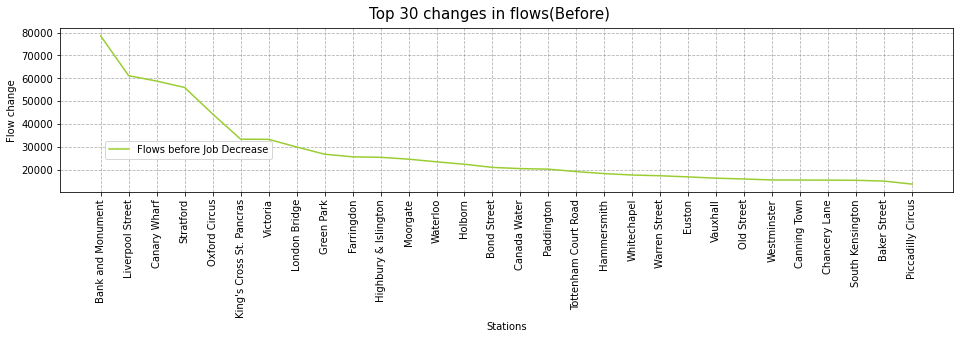

In [54]:
# top 30 flows before Brexit

fig, ax = plt.subplots(1, 1, figsize=(16, 3))
fig.suptitle(
    "Top 30 changes in flows(Before) ", fontsize=15
)  # Decrease in Canary Wharf's jobs

ax.plot(list(diff_sa1["flows"])[0:], color="yellowgreen", label="Flows before Job Decrease")

# plot
ax.grid(color="grey", linestyle="--", alpha=0.6)
ax.set_xlabel("Stations")
ax.set_ylabel("Flow change")
ax.set_xticks(list(range(30)))
ax.set_xticklabels(list(diff_sa1["station_destination"])[0:30], rotation=90)
ax.legend(bbox_to_anchor=(0.05, 0.2), loc="lower left", borderaxespad=0)
plt.show()

In [55]:
# plot for flows after brexi
diff_sa2 = london_flows.groupby("station_destination", as_index=False).agg(
    {"flows": "sum", "prodsimest4": "sum"}
)
diff_sa2["diff"] = diff_sa2["prodsimest4"] - diff_sa2["flows"]

diff_sa2["diff_abs"] = abs(diff_sa2["diff"])

diff_sa2.sort_values(by=["prodsimest4"], ascending=False, inplace=True)
diff_sa2 = diff_sa2.head(30)
diff_sa2.head(5)

,station_destination,flows,prodsimest4,diff,diff_abs
15,Bank and Monument,78549,70019.0,-8530.0,8530.0
326,Stratford,55954,67147.0,11193.0,11193.0
212,Liverpool Street,61122,59369.0,-1753.0,1753.0
251,Oxford Circus,44368,40062.0,-4306.0,4306.0
197,King's Cross St. Pancras,33330,30803.0,-2527.0,2527.0


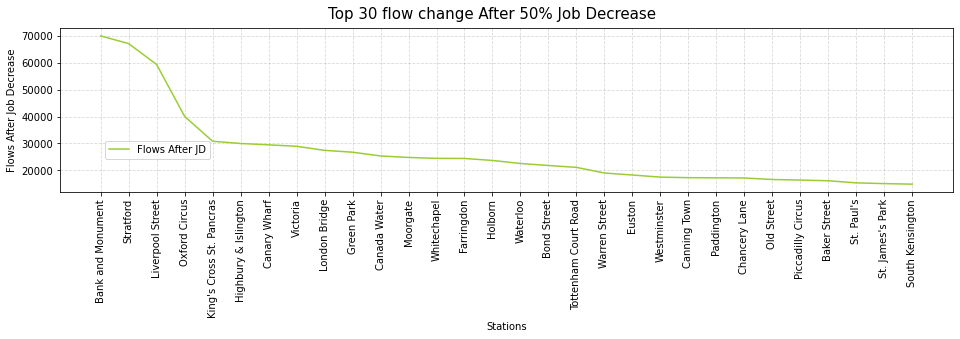

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(16, 3))
fig.suptitle(
    "Top 30 flow change After 50% Job Decrease", fontsize=15
)  

ax.plot(
    list(diff_sa2["prodsimest4"])[0:], color="yellowgreen", label="Flows After JD"
)

ax.grid(color="grey", linestyle="--", alpha=0.3)
ax.set_xlabel("Stations")
ax.set_ylabel("Flows After Job Decrease")
ax.set_xticks(list(range(30)))
ax.set_xticklabels(list(diff_sa2["station_destination"])[0:30], rotation=90)
ax.legend(bbox_to_anchor=(0.05, 0.2), loc="lower left", borderaxespad=0)
plt.show()

## B1

In [57]:
london_flowsb = london_flows.copy()

In [58]:
beta1 = beta * 25
beta2 = beta * 250

In [59]:
dj_gamma2 = london_flowsb["jobs"] ** gamma  # use old jobs

# 25*beta
dist_beta1 = np.exp(london_flowsb["distance"] * -beta1)
london_flowsb["Ai1_sb"] = dj_gamma2 * dist_beta1
A_i = pd.DataFrame(london_flowsb.groupby(["station_origin"])["Ai1_sb"].agg(np.sum))
A_i["Ai1_sb"] = 1 / A_i["Ai1_sb"]
A_i.rename(columns={"Ai1_sb": "A_i1_sb"}, inplace=True)
london_flowsb = london_flowsb.merge(
    A_i, left_on="station_origin", right_index=True, how="left"
)


# 250*beta
dist_beta2 = np.exp(london_flowsb["distance"] * -beta2)
london_flowsb["Ai2_sb"] = dj_gamma2 * dist_beta2
A_i2 = pd.DataFrame(london_flowsb.groupby(["station_origin"])["Ai2_sb"].agg(np.sum))
A_i2["Ai2_sb"] = 1 / A_i2["Ai2_sb"]
A_i2.rename(columns={"Ai2_sb": "A_i2_sb"}, inplace=True)
london_flowsb = london_flowsb.merge(
    A_i2, left_on="station_origin", right_index=True, how="left"
)

In [60]:
london_flowsb["prodsimestsb1"] = (
    london_flowsb["A_i1_sb"] * london_flowsb["population"] * dj_gamma2 * dist_beta1
)
london_flowsb["prodsimestsb1"] = round(london_flowsb["prodsimestsb1"])

london_flowsb["prodsimestsb2"] = (
    london_flowsb["A_i2_sb"] * london_flowsb["population"] * dj_gamma2 * dist_beta2
)
london_flowsb["prodsimestsb2"] = round(london_flowsb["prodsimestsb2"])

london_flowsb[["prodsimest4", "prodsimestsb1", "prodsimestsb2", "flows"]] .head(5)

,prodsimest4,prodsimestsb1,prodsimestsb2,flows
0,83.0,0.0,0.0,0
1,2.0,0.0,0.0,1
2,4.0,0.0,0.0,3
3,63.0,0.0,0.0,1
4,60.0,1.0,0.0,37


In [61]:
# plot for the SA
london_flows_sb0 = london_flowsb.groupby("station_origin", as_index=False).agg(
    {"flows": "sum"}
)
london_flows_sb0.sort_values(by=["flows"], ascending=False, inplace=True)


london_flows_sb = london_flowsb.groupby("station_origin", as_index=False).agg(
    {"prodsimest4": "sum"}
)
london_flows_sb.sort_values(by=["prodsimest4"], ascending=False, inplace=True)

london_flows_sb1 = london_flowsb.groupby("station_origin", as_index=False).agg(
    {"prodsimestsb1": "sum"}
)
london_flows_sb1.sort_values(by=["prodsimestsb1"], ascending=False, inplace=True)

london_flows_sb2 = london_flowsb.groupby("station_origin", as_index=False).agg(
    {"prodsimestsb2": "sum"}
)
london_flows_sb2.sort_values(by=["prodsimestsb2"], ascending=False, inplace=True)

london_flows_sbx = london_flowsb.groupby("station_origin", as_index=False).agg(
    { "flows": "sum","prodsimest4": "sum", "prodsimestsb1": "sum","prodsimestsb2": "sum",
    }
)
london_flows_sbx.sort_values(by=["prodsimest4"], ascending=False, inplace=True)


london_flows_sbx.head(5)

,station_origin,flows,prodsimest4,prodsimestsb1,prodsimestsb2
364,Waterloo,67314,67312.0,67370.0,67372.0
326,Stratford,59311,59311.0,59312.0,59311.0
355,Victoria,37517,37524.0,37517.0,37517.0
213,London Bridge,32593,32595.0,32600.0,32597.0
212,Liverpool Street,31473,31471.0,31474.0,31473.0


In [62]:
# plot for the Sb1
diff_sb1 = london_flowsb.groupby("station_destination", as_index=False).agg(
    {"flows": "sum", "prodsimestsb1": "sum"}
)
diff_sb1["diff"] = diff_sb1["prodsimestsb1"] - diff_sb1["flows"]
# prodsimestsb2
diff_sb1["diff_abs"] = abs(diff_sb1["diff"])
diff_sb1.sort_values(by=["prodsimestsb1"], ascending=False, inplace=True)
diff_sb1 = diff_sb1.head(30)
diff_sb1.head(5)

,station_destination,flows,prodsimestsb1,diff,diff_abs
327,Stratford High Street,788,43744.0,42956.0,42956.0
15,Bank and Monument,78549,40883.0,-37666.0,37666.0
227,Moorgate,24574,26828.0,2254.0,2254.0
313,Southwark,10326,25012.0,14686.0,14686.0
315,St. James's Park,13339,24396.0,11057.0,11057.0


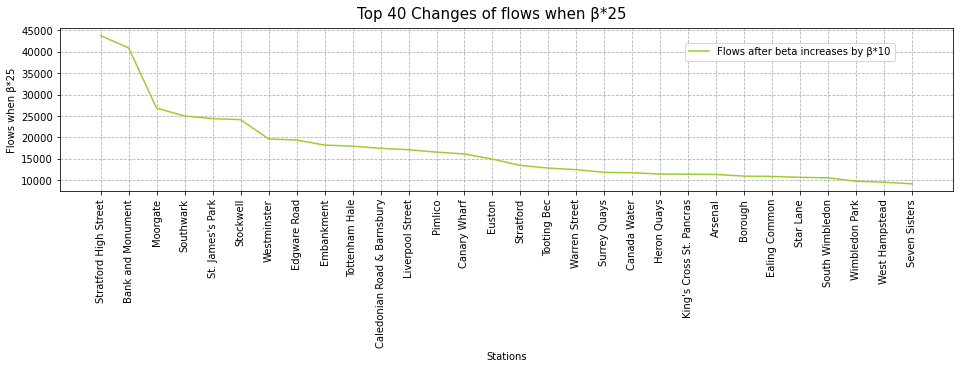

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(16, 3))
fig.suptitle(
    "Top 40 Changes of flows when β*25", fontsize=15
)  # Decrease in Canary Wharf's jobs

ax.plot(list(diff_sb1["prodsimestsb1"])[0:],color="yellowgreen",label="Flows after beta increases by β*10",
)

ax.grid(color="grey", linestyle="--", alpha=0.6)
ax.set_xlabel("Stations")
ax.set_ylabel("Flows when β*25")
ax.set_xticks(list(range(30)))
ax.set_xticklabels(list(diff_sb1["station_destination"])[0:30], rotation=90)
ax.legend(bbox_to_anchor=(0.7, 0.8), loc="lower left", borderaxespad=0)
plt.show()

In [64]:
# plot for the Sb1
diff_sb1 = london_flowsb.groupby("station_destination", as_index=False).agg(
    {"flows": "sum", "prodsimestsb1": "sum"}
)
diff_sb1["diff"] = diff_sb1["prodsimestsb1"] - diff_sb1["flows"]
# prodsimestsb2
diff_sb1["diff_abs"] = abs(diff_sb1["diff"])
diff_sb1.sort_values(by=["diff_abs"], ascending=False, inplace=True)
diff_sb1 = diff_sb1.head(30)
diff_sb1.head(5)

,station_destination,flows,prodsimestsb1,diff,diff_abs
212,Liverpool Street,61122,17137.0,-43985.0,43985.0
327,Stratford High Street,788,43744.0,42956.0,42956.0
54,Canary Wharf,58772,16151.0,-42621.0,42621.0
326,Stratford,55954,13477.0,-42477.0,42477.0
251,Oxford Circus,44368,4400.0,-39968.0,39968.0


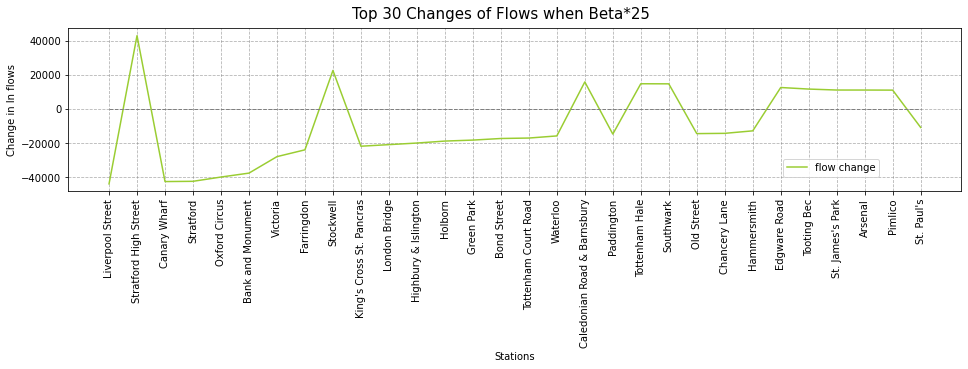

In [65]:
# plot for the SA
fig, ax = plt.subplots(1, 1, figsize=(16, 3))
fig.suptitle(
    "Top 30 Changes of Flows when Beta*25", fontsize=15
)  # Decrease in Canary Wharf's jobs


ax.plot(list(diff_sb1["diff"])[0:], color="yellowgreen", label="flow change")
ax.plot([0] * 30, color="grey", linestyle="--", linewidth=1)

ax.grid(color="grey", linestyle="--", alpha=0.6)
ax.set_xlabel("Stations")
ax.set_ylabel("Change in In flows")

ax.set_xticks(list(range(30)))
ax.set_xticklabels(list(diff_sb1["station_destination"])[0:30], rotation=90)
ax.legend(bbox_to_anchor=(0.8, 0.2), loc="upper left", borderaxespad=0)

plt.show()

In [66]:
# plot for the Sb1
diff_sb2 = london_flowsb.groupby("station_destination", as_index=False).agg(
    {"flows": "sum", "prodsimestsb2": "sum"}
)
diff_sb2["diff"] = diff_sb2["prodsimestsb2"] - diff_sb2["flows"]
# prodsimestsb2
diff_sb2["diff_abs"] = abs(diff_sb2["diff"])
diff_sb2.sort_values(by=["diff_abs"], ascending=False, inplace=True)
diff_sb2 = diff_sb2.head(30)
diff_sb2.head(5)

,station_destination,flows,prodsimestsb2,diff,diff_abs
15,Bank and Monument,78549,1672.0,-76877.0,76877.0
327,Stratford High Street,788,59312.0,58524.0,58524.0
212,Liverpool Street,61122,4628.0,-56494.0,56494.0
201,Lambeth North,1319,56062.0,54743.0,54743.0
326,Stratford,55954,3607.0,-52347.0,52347.0


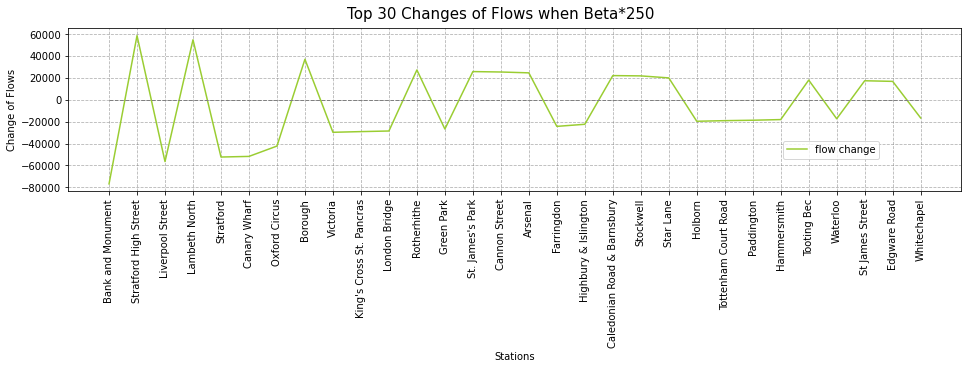

In [67]:
# plot for the SA
fig, ax = plt.subplots(1, 1, figsize=(16, 3))
fig.suptitle("Top 30 Changes of Flows when Beta*250", fontsize=15)


ax.plot(list(diff_sb2["diff"])[0:], color="yellowgreen", label="flow change")
ax.plot([0] * 30, color="grey", linestyle="--", linewidth=1)

ax.grid(color="grey", linestyle="--", alpha=0.6)
ax.set_xlabel("Stations")
ax.set_ylabel("Change of Flows")

ax.set_xticks(list(range(30)))
ax.set_xticklabels(list(diff_sb2["station_destination"])[0:30], rotation=90)
ax.legend(bbox_to_anchor=(0.8, 0.2), loc="lower left", borderaxespad=0)
plt.show()